In [1]:
import sys
sys.path.insert(0,'../python/')
from OpticalPhoton import *
import matplotlib.pyplot as plt

In [2]:
myPhoton = OpticalPhoton()

In [3]:
myPhoton.generate_photon_direction()

In [4]:
ct = []
for i in range(100000):
    myPhoton.generate_photon_direction()
    ct.append(myPhoton.t[2])

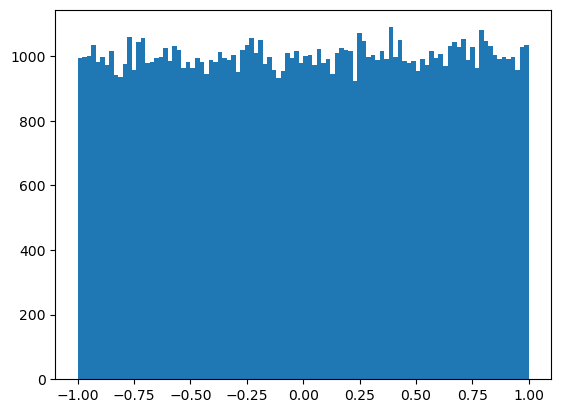

In [5]:
h=plt.hist(ct,bins=100)

In [14]:
myPhoton.set_photon_position([0,0,0])
myPhoton.x0
myPhoton.current_medium
for i in range(10):
    myPhoton.generate_photon_direction()
    xx = myPhoton.intersection_with_cylinder(30,-3,3)
    if xx:
        print('direction',myPhoton.t)
        
        xt = xx[0]
        print(len(xx),'intersection',xt, ' r =',np.sqrt(xt[0]**2+xt[1]**2))


direction (-0.7412503991275822, -0.6710580911516901, 0.015128915792280324)
1 intersection (-22.240057317157163, -20.134047047962422, 0.4539194242091012)  r = 30.000000000000004
direction (-0.18865497408079535, -0.6647792468033085, -0.7228262957130158)
1 intersection (-0.782988839226031, -2.7590829944041477, -3)  r = 2.8680325124312462
direction (0.4322806291382728, 0.04773853572324408, -0.9004745914676435)
1 intersection (1.440175991308265, 0.15904458440777489, -3)  r = 1.4489313530220076
direction (0.32594929906500986, 0.62606676508829, 0.7083766371718598)
1 intersection (1.3804067580475456, 2.651414793637806, 3)  r = 2.9892345551302504
direction (-0.3426477062130762, 0.8111044566740235, 0.47402754117293056)
1 intersection (-2.1685303687116853, 5.1332742481609746, 3)  r = 5.5725244249673285
direction (0.01449553226354044, -0.8092100239938311, -0.587340630820225)
1 intersection (0.07403982375592166, -4.133257507813298, -3)  r = 4.1339205993096675
direction (0.8144751526917368, -0.53424